## HAM Project

In [130]:
#Run this cell without changes
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [131]:
conn = sqlite3.connect('./zippedData/im.db')

In [132]:
imdb_schema = pd.read_sql("""

SELECT * from sqlite_master

""",conn)

imdb_schema

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [133]:
def read_sql_as_df(table_name, con):
   
    query = """SELECT * FROM ({table_name})""".format(table_name = table_name)
    return pd.read_sql(query,con)

In [134]:
tmdb_movies_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [135]:
movie_budget = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [136]:
movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'])
movie_budget['Year'] = movie_budget['release_date'].dt.year
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0,2018
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495",1999
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0,2015


In [137]:
decades_df = movie_budget[(movie_budget['Year'] >= 1980) & (movie_budget['Year'] <=2000)]

In [138]:
new_decades_df = movie_budget[(movie_budget['Year'] >= 2000)]

In [173]:
decades_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
42,43,1997-12-19,Titanic,"$200,000,000","$659,363,944","$2,208,208,395",1997
106,7,1999-06-30,Wild Wild West,"$175,000,000","$113,805,681","$221,229,335",1999
109,10,1995-07-28,Waterworld,"$175,000,000","$88,246,220","$264,246,220",1995
199,100,1999-06-16,Tarzan,"$145,000,000","$171,091,819","$448,191,819",1999
207,8,1998-07-01,Armageddon,"$140,000,000","$201,578,182","$554,600,000",1998
...,...,...,...,...,...,...,...
5752,53,1991-08-01,Slacker,"$23,000","$1,227,508","$1,227,508",1991
5762,63,1997-04-11,Pink Flamingos,"$12,000","$413,802","$413,802",1997
5769,70,1996-04-01,Bang,"$10,000",$527,$527,1996
5773,74,1993-02-26,El Mariachi,"$7,000","$2,040,920","$2,041,928",1993


In [140]:
TB_financials_df = new_decades_df

In [141]:
TB_financials_df['production_budget'] = TB_financials_df['production_budget'].str.replace('$','')
TB_financials_df['production_budget'] = TB_financials_df['production_budget'].str.replace(',','')
TB_financials_df['domestic_gross'] = TB_financials_df['domestic_gross'].str.replace('$','')
TB_financials_df['domestic_gross'] = TB_financials_df['domestic_gross'].str.replace(',','')
TB_financials_df['worldwide_gross'] = TB_financials_df['worldwide_gross'].str.replace('$','')
TB_financials_df['worldwide_gross'] = TB_financials_df['worldwide_gross'].str.replace(',','')

<ipython-input-141-f0444b46b1f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TB_financials_df['production_budget'] = TB_financials_df['production_budget'].str.replace('$','')
<ipython-input-141-f0444b46b1f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TB_financials_df['production_budget'] = TB_financials_df['production_budget'].str.replace(',','')
<ipython-input-141-f0444b46b1f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [180]:
TB_financials_df['production_budget'] = TB_financials_df['production_budget'].astype(float)
TB_financials_df['domestic_gross'] = TB_financials_df['domestic_gross'].astype(float)
TB_financials_df['worldwide_gross'] = TB_financials_df['worldwide_gross'].astype(float)

<ipython-input-180-b6393d9e39d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TB_financials_df['production_budget'] = TB_financials_df['production_budget'].astype(int)
<ipython-input-180-b6393d9e39d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TB_financials_df['domestic_gross'] = TB_financials_df['domestic_gross'].astype(int)
<ipython-input-180-b6393d9e39d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [185]:
decades_ROI_df = TB_financials_df[['worldwide_gross', 'production_budget', 'Year', 'movie']]
decades_ROI_df = decades_ROI_df.sort_values(by='worldwide_gross',ascending=False) 
decades_ROI_df.describe()

,worldwide_gross,production_budget,Year
count,4.387000e+03,4.387000e+03,4387.000000
mean,9.693220e+07,3.450823e+07,2009.314110
std,1.862101e+08,4.550905e+07,5.275648
min,0.000000e+00,1.100000e+03,2000.000000
25%,2.689139e+06,5.000000e+06,2005.000000
50%,2.936714e+07,1.800000e+07,2010.000000
75%,1.014737e+08,4.300000e+07,2014.000000
max,2.776345e+09,4.250000e+08,2020.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fafb0272b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fafccd5b280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fafb0272850>],
 'medians': [<matplotlib.lines.Line2D at 0x7fafccd5bd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fafa85da070>],
 'means': []}

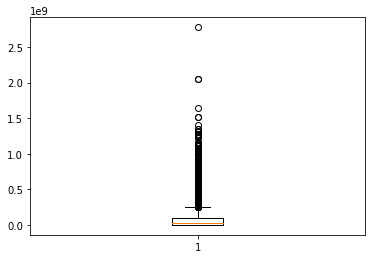

In [182]:
fig, ax = plt.subplots()

ax.boxplot(decades_ROI_df['worldwide_gross'])

In [144]:
duplicated_movies = movie_budget[movie_budget['movie'].duplicated(keep=False)==True]
duplicated_movies = duplicated_movies.sort_values(by='movie')
duplicated_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
4270,71,1954-12-23,"20,000 Leagues Under the Sea","$5,000,000","$28,200,000","$28,200,000",1954
5614,15,1916-12-24,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000",1916
1648,49,2010-04-30,A Nightmare on Elm Street,"$35,000,000","$63,075,011","$117,729,621",2010
5016,17,1984-11-09,A Nightmare on Elm Street,"$1,800,000","$25,504,513","$25,504,513",1984
2032,33,1992-11-11,Aladdin,"$28,000,000","$217,350,219","$504,050,219",1992
...,...,...,...,...,...,...,...
3403,4,2017-04-21,Unforgettable,"$12,000,000","$11,368,012","$16,221,211",2017
1420,21,2011-02-18,Unknown,"$40,000,000","$63,686,397","$136,123,083",2011
4583,84,2006-11-03,Unknown,"$3,700,000","$26,403","$3,355,048",2006
2313,14,2005-09-16,Venom,"$25,000,000","$881,745","$881,745",2005


In [122]:
movie_budget['Reboot'] = movie_budget['movie'].duplicated(keep=False)==True
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Reboot
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,False
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,False
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,False
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,False
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,False
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0,2018,False
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495",1999,False
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,False
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0,2015,False


In [123]:

strings_to_remove = ['$',',']

def remove_chars(ds,char):
    """
    remove characters from the data series
    """
    for char in char:
        idx = 0
        for row in ds:
            if char in row:
                ds[idx] = row.replace(char,"")
            idx +=1
    return ds

In [124]:
TB_financials_df['movie_year'] = TB_financials_df['movie'] + ' ' + TB_financials_df['Year'].astype(str)

<ipython-input-124-b5d8fd7e582b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TB_financials_df['movie_year'] = TB_financials_df['movie'] + ' ' + TB_financials_df['Year'].astype(str)


In [125]:
movie_budget['movie_year'] = movie_budget['movie'] + ' ' + movie_budget['Year'].astype(str)
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Reboot,movie_year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,False,Avatar 2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,False,Pirates of the Caribbean: On Stranger Tides 2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,False,Dark Phoenix 2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,False,Avengers: Age of Ultron 2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,False,Star Wars Ep. VIII: The Last Jedi 2017
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0,2018,False,Red 11 2018
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495",1999,False,Following 1999
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,False,Return to the Land of Wonders 2005
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0,2015,False,A Plague So Pleasant 2015


In [126]:
Decades_reboot = movie_budget.merge(TB_financials_df, how = 'left', on = 'movie_year')
Decades_reboot[Decades_reboot[Decades_reboot['Reboot'] ==True]]


ValueError: Boolean array expected for the condition, not object

## Jupyter Placeholder with learn-env

### Problem:

- Microsoft want to create a new movie studio but have no idea about creating movies
- respondible to ecplore what types of films are currently doing the best at the box office
- turn analysis to actionable insights
- the results from that will help Microsoft's new movie studio decide what type of films to create.

### Data:

- main data to use: IMDB (sql data) - movie_basics and movie_ratings table
- bom.movie_gross.csv 

### Analysis:

- Your analysis should yield three concrete business recommendations.
- Communicating about your work well is extremely important.
- highlighting the most important points and skipping over the rest.
- Use plenty of visualizations.
-  three visualizations which correspond to three business recommendations.

### Measurements to consider in measuring a movie's success based on [article](https://www.hollywoodreporter.com/movies/movie-news/what-is-profitable-movie-ever-1269879/)

- production cost
- box office gross
- marketing domestic/international
- rentals (the money the studio makes)
- distribution fee
- theatrical profit 
- international revenue



### Measurements available from data files

- domestic gross
- foreign gross


## Data understanding

### IMDB Database

* `movie_basics` : Table containing movies including original movie title, premiered movie title(primary title?), release year, length of the movie and the genre
* `persons` : Table containing the name of people in the theatre entertainment industry and their primary profession (actor, director etc.)
* `directors`: Table with movie ID and its correspongin director's ID
* `known_for`: Table containing the person's ID and the corresponding movie ID that the person is known for.
* `movie_akas`: Table containing movies and the title they are known as in different countries.
* `movie_ratings`: Table containing movie ID and their average rating and number of ratings they received on IMDB
* `principals`: Table containing movie ID and the corresponding person ID that is involved in the movie in some sort of capacity, specified in the category, jobs and character (if they are actors) columns.
* `writers` : Table containing movie ID and their corresponding writers' person ID

### bom.movie_gross.csv
* **Source** : This dataset comes from [Box office mojo](https://www.boxofficemojo.com/) - a website that tracks film revenue
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### rt.movie_info.tsv
* **Source** : This dataset comes from [Rotten Tomatoes](https://www.rottentomatoes.com/) - an "online aggregator of movie and TV show reviews from critics"
* **Contents** : Data about movies including their synopsis, rating, genre, director, writer, release data in theatre, release data on DVD, Box office rental profit, length of movie and studio of production.

### rt.reviews.tsv
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### tmdb.movies.csv
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### tn.movie_budgets.csv
* **Contents** : Data about movies' production budget along with release date, domestic gross and worldwide gross


Below we import the `sqlite3`, `pandas` and `numpy`, which will be used to for reading and exploring our data. We are also importing `seaborn` and `matplotlib` modules, which we will use for visualization.

In [20]:
#Run this cell without changes
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Functions for our analysis

In [21]:
strings_to_remove = ['$',',']

def remove_chars(ds,char):
    """
    remove characters from the data series
    -
    ds: data series, lists. Element in data series or list must be a string.
    char: character to be removed. Accepts str, lists
    """
    for char in char:
        idx = 0
        for row in ds:
            if char in row:
                ds[idx] = row.replace(char,"")
            idx +=1
    return ds


In [22]:
def read_sql_as_df(table_name, con):
    """
    Selects all columns in a database table and convert it into a Dataframe
    -
    Input:
    table_name = takes in a string of the table name to import
    con = variable that has the established database connection   
    -
    Output:
    DataFrame containing all columns of the database table.
    """
    query = """SELECT * FROM ({table_name})""".format(table_name = table_name)
    return pd.read_sql(query,con)

### IMDB Data

In [23]:
conn = sqlite3.connect('./zippedData/im.db')

In [24]:
imdb_schema = pd.read_sql("""

SELECT * from sqlite_master

""",conn)
imdb_schema

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [25]:
movie_akas_df = read_sql_as_df('movie_akas',conn)
movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [26]:
movie_ratings_df = read_sql_as_df('movie_ratings',conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [27]:
directors_df = read_sql_as_df('directors',conn)
directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [28]:
writers_df = read_sql_as_df('writers',conn)
writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [29]:
movie_basics_df = read_sql_as_df('movie_basics',conn)
movie_basics_df.tail()
# movie_basics.columns

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [30]:
persons_df = read_sql_as_df('persons',conn)
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [31]:
known_for_df = read_sql_as_df("known_for",conn)
known_for_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [32]:
principals_df = read_sql_as_df("principals",conn)
principals_df.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


### Non database data

#### Rotten Tomatoes

In [70]:
rt_movies_df = pd.read_csv('/zippedData/rotten_tomatoes_movies.csv')
rt_movies_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/zippedData/rotten_tomatoes_movies.csv'

In [ ]:
movie_info_df = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', delimiter = '\t')
movie_info_df.head(3)

In [ ]:
movie_reviews_df = pd.read_csv('./zippedData/rt.reviews.tsv.gz', delimiter = '\t',encoding = 'unicode_escape')
movie_reviews_df.head()

#### The number (budgets)

In [ ]:
movie_budget_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
movie_budget_df.head()
# movie_budget_df.info()

#### Box office mojo (gross profit)

In [ ]:
movie_gross_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
movie_gross_df.head()
# movie_gross_df.info()

#### TMDB movies

In [ ]:
tmdb_movies_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
remove_chars(tmdb_movies_df['genre_ids'],["[","]"]) #genre_ids now is a string. Function turns it into a list.

tmdb_movies_df.head()
# tmdb_movies_df.info()

In [ ]:
#Rreplace field that's entirely space (or empty) with '101', which is the genre key for genre "Unknown"
tmdb_movies_df['genre_ids'] = tmdb_movies_df['genre_ids'].str.replace(r'^\s*$','101')

In [ ]:
tmdb_movies_df.info()

### Get genre ID from TMDB using API

In [ ]:
import requests
from keys import tmdb_key #keys is the python file 

tmdb_2 = tmdb_key

In [ ]:
# tmdb_url = f"https://api.themoviedb.org/3/genre/movie/list?api_key={tmdb_2}&language=en-US"

# #get response
# resp_tmdb = requests.get(tmdb_url)

# tmdb_json = resp_tmdb.json()
# tmdb_json['genres']
# tmdb_genre= {num['id']:num['name'] for num in tmdb_json['genres']}
# tmdb_genre[101] = 'Unknown'
# tmdb_genre

In [34]:
tmdb_genre= {28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western',
 101: 'Unknown'}

In [35]:
# for genre_list in tmdb_movies_df['genre_ids']:
#     genre_list = genre_list.split(', ')
#     genre_names=[]
#     for genre_id in genre_list:
#         if genre_id
#         genre_id=int(genre_id)
# #         print(type(genre_id))
#         genre_names = [tmdb_genre[genre_id]]


In [36]:
tmdb_movies_df.iloc[517]

Unnamed: 0                                  517
genre_ids                                    []
id                                        31059
original_language                            ru
original_title         Наша Russia: Яйца судьбы
popularity                                3.867
release_date                         2010-01-21
title                Nasha Russia: Yaytsa sudby
vote_average                                4.3
vote_count                                   25
Name: 517, dtype: object

In [37]:
genre_names_lists=[]
idx = 0
for genre_list in tmdb_movies_df['genre_ids']:
    genre_list = genre_list.split(', ')
    genre_names=[]
    genre_names = [tmdb_genre[int(genre_id)] for genre_id in genre_list]
    genre_names_lists.append(genre_names)
tmdb_movies_df['genre_names'] = genre_names_lists

ValueError: invalid literal for int() with base 10: '[12'

In [38]:
tmdb_movies_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


### Start of preliminary Data exploratory

#### Genre popularity using IM.DB data

In [39]:
#Join the table movie_basics and movie_ratings to start exploring popularity and average reviews by genre.


movie_basics_reviews = pd.read_sql("""
SELECT mb.movie_id, mb.primary_title ,mb.start_year,mb.runtime_minutes, mb.genres
        ,r.averagerating, r.numvotes
        
FROM movie_basics as mb
INNER JOIN movie_ratings as r
        ON mb.movie_id = r.movie_id

""",conn)
movie_basics_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ MB


In [40]:
movie_basics_reviews.isna().sum() #checkout null values in our new table

movie_id              0
primary_title         0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [41]:
#drop rows with null values in the genre column
movie_basics_reviews_cleaned = movie_basics_reviews.dropna(subset =['genres']) 

In [42]:
#Reset the table index after dropping the null rows
movie_basics_reviews_cleaned=movie_basics_reviews_cleaned.reset_index(drop=True)

movie_basics_reviews_cleaned

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73047,tt9913056,Swarm Season,2019,86.0,Documentary,6.2,5
73048,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
73049,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73050,tt9914642,Albatross,2017,NaN,Documentary,8.5,8


In [43]:
#List of common film genres

genre_list=["Action","Comedy","Drama","Fantasy","Horror","Mystery","Romance","Thriller","Western","Sci-Fi","Animation"
            ,"Documentary","Biography","Crime","Musical","History","Family"]

In [75]:
tmdb_genre= {28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western',
 101: 'Unknown'}

list(tmdb_genre.values())

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'Unknown']

In [83]:
#Make a new column for each genre with boolean values. True if genre is one of the movie's genre list.

for genre in tmdb_genre:
    tmdb_genre[genre]=[True if genre in movie else False for movie in tmdb_genre[genre]]

TypeError: 'in <string>' requires string as left operand, not int

In [45]:
movie_basics_reviews_cleaned.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Comedy,Drama,...,Thriller,Western,Sci-Fi,Animation,Documentary,Biography,Crime,Musical,History,Family
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,True,False,True,...,False,False,False,False,False,False,True,False,False,False
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [46]:
#Create genre popularity dict with genre name as keys and number of movies with that genre as values. The total values of all
#keys will be more than the total movies in the data because some movies are considered as multiple genres.

genre_popularity = { genre: movie_basics_reviews_cleaned[genre].sum() for genre in genre_list}
genre_popularity_values_sorted = dict(sorted(genre_popularity.items(),key=lambda item: item[1]))
genre_popularity_keys_sorted = dict(sorted(genre_popularity.items(),key=lambda item: item[0]))

In [47]:
genre_popularity

{'Action': 6988,
 'Comedy': 17290,
 'Drama': 30788,
 'Fantasy': 2126,
 'Horror': 7674,
 'Mystery': 3039,
 'Romance': 6589,
 'Thriller': 8217,
 'Western': 280,
 'Sci-Fi': 2206,
 'Animation': 1743,
 'Documentary': 17753,
 'Biography': 3809,
 'Crime': 4611,
 'Musical': 721,
 'History': 2825,
 'Family': 3412}

In [48]:
pd.DataFrame.from_dict(genre_popularity.values()).describe()

,0
count,17.000000
mean,7063.000000
std,7946.144128
min,280.000000
25%,2206.000000
50%,3809.000000
75%,7674.000000
max,30788.000000


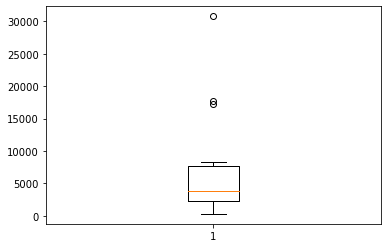

In [49]:
#Boxplot of genre popularity. Shows the genres that are outliers in terms of popularity
fig, ax = plt.subplots()

ax.boxplot(list(genre_popularity.values()))


plt.show()

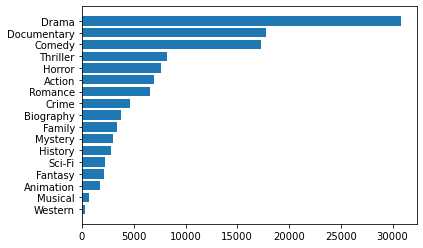

In [50]:
#Bar Plot of Genre Popularity. 

fig, ax = plt.subplots()

ax.barh(list(genre_popularity_values_sorted.keys()),genre_popularity_values_sorted.values())


plt.show()

In [51]:
#Create empty dictionary that we will populate with genres as keys and average rating of all movies in the genre as values
genre_rating ={} 

#Calculating average rating:
for genre in genre_list: #loop through genre in the genre list defined prior
    n = 0 #number of movies 
    rating_sum = 0 #rating summation
    idx =0  #keep track of row index
    for row in movie_basics_reviews_cleaned[genre]: #go down row by row in genre column
        if (row==True): #if genre in genre list is in genre in the row
#             print(test['averagerating'][0])
            rating_sum += movie_basics_reviews_cleaned['averagerating'][idx] #grab the average rating and add it to the total sum
            n+=1 #add one to count of movie with that genre
        idx +=1 #keep track of row index
    genre_rating[genre] = rating_sum/n #calculate average rating of the genre
    
genre_rating_values_sorted =dict(sorted(genre_rating.items(),key=lambda item: item[1]))
genre_rating_keys_sorted = dict(sorted(genre_rating.items(),key=lambda item: item[0]))

In [52]:
genre_rating

{'Action': 5.810360618202613,
 'Comedy': 6.002689415847302,
 'Drama': 6.401559048980236,
 'Fantasy': 5.919473189087487,
 'Horror': 5.00344018764659,
 'Mystery': 5.920401447844683,
 'Romance': 6.146607983001951,
 'Thriller': 5.639114031885117,
 'Western': 5.868214285714282,
 'Sci-Fi': 5.4897552130552985,
 'Animation': 6.248307515777409,
 'Documentary': 7.332090350926571,
 'Biography': 7.162273562614873,
 'Crime': 6.115441335935799,
 'Musical': 6.498335644937577,
 'History': 7.040955752212392,
 'Family': 6.394724501758511}

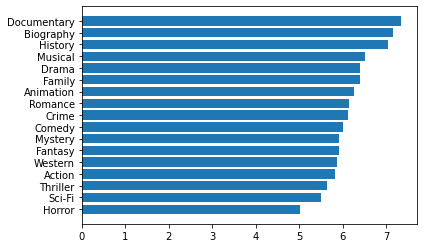

In [53]:
# Average rating by genre

fig, ax = plt.subplots()

ax.barh(list(genre_rating_values_sorted.keys()),genre_rating_values_sorted.values())


plt.show()

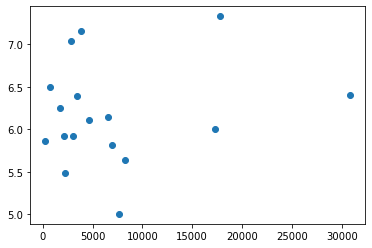

In [54]:
# Looking at correlation between genre popularity and genre's average rating

fig, ax = plt.subplots()

ax.scatter(genre_popularity_keys_sorted.values(),genre_rating_keys_sorted.values())


plt.show()

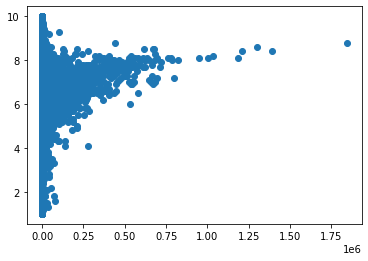

In [55]:
# Looking at correlation between average rating and number of reviews

fig, ax = plt.subplots()

ax.scatter(movie_basics_reviews_cleaned['numvotes'],movie_basics_reviews_cleaned['averagerating'])


plt.show()

#### Genre Popularity using TMDB data

## Explore how casts/directors/actors affects popularity and ROI

In [56]:
principals_mb = principals_df.merge(movie_basics_df,how = 'left',on ='movie_id')

In [57]:
principals_mb_persons = principals_mb.merge(persons_df,how ='left',on ='person_id')
principals_mb_persons.head(3)

,movie_id,ordering,person_id,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,birth_year,death_year,primary_profession
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]",A Thin Life,A Thin Life,2018,75.0,Comedy,Tommy Dysart,NaN,NaN,actor
1,tt0111414,2,nm0398271,director,None,None,A Thin Life,A Thin Life,2018,75.0,Comedy,Frank Howson,1952.0,NaN,"actor,writer,producer"
2,tt0111414,3,nm3739909,producer,producer,None,A Thin Life,A Thin Life,2018,75.0,Comedy,Barry Porter-Robinson,NaN,NaN,"producer,art_department"


In [58]:
principal_actors = principals_mb_persons[principals_mb_persons['category'] == "actor"]
principal_actors.head()

,movie_id,ordering,person_id,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,birth_year,death_year,primary_profession
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]",A Thin Life,A Thin Life,2018,75.0,Comedy,Tommy Dysart,NaN,NaN,actor
5,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",Henry Garrett,NaN,NaN,actor
6,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",Graham McTavish,1961.0,NaN,"actor,soundtrack,director"
14,tt0417610,1,nm0532721,actor,None,"[""Lucio""]",Asleep in the Sun,Dormir al sol,2010,83.0,Fantasy,Luis Machín,1968.0,NaN,"actor,cinematographer"
16,tt0417610,3,nm0069209,actor,None,"[""Dr. Samaniego""]",Asleep in the Sun,Dormir al sol,2010,83.0,Fantasy,Carlos Belloso,1963.0,NaN,"actor,soundtrack"


In [59]:
principal_actors.isna().sum()

movie_id                   0
ordering                   0
person_id                  0
category                   0
job                   256718
characters             52167
primary_title              0
original_title             0
start_year                 0
runtime_minutes        57325
genres                  6448
primary_name             157
birth_year            177477
death_year            253776
primary_profession     13973
dtype: int64

In [60]:
len(principal_actors['person_id'].unique())

157948

In [61]:
principal_actors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256718 entries, 0 to 1028181
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            256718 non-null  object 
 1   ordering            256718 non-null  int64  
 2   person_id           256718 non-null  object 
 3   category            256718 non-null  object 
 4   job                 0 non-null       object 
 5   characters          204551 non-null  object 
 6   primary_title       256718 non-null  object 
 7   original_title      256718 non-null  object 
 8   start_year          256718 non-null  int64  
 9   runtime_minutes     199393 non-null  float64
 10  genres              250270 non-null  object 
 11  primary_name        256561 non-null  object 
 12  birth_year          79241 non-null   float64
 13  death_year          2942 non-null    float64
 14  primary_profession  242745 non-null  object 
dtypes: float64(3), int64(2), object(1

In [62]:
principal_actors['primary_name'].value_counts()

Eric Roberts        147
Brahmanandam        126
Prakash Raj          79
Mihir Das            71
Tom Sizemore         70
                   ... 
Brodie Alexander      1
Jesper Groth          1
Sal Lizard            1
Jim Coppens           1
Ajdin Hasanic         1
Name: primary_name, Length: 153885, dtype: int64

In [63]:
actor_20 = list(principal_actors['primary_name'].value_counts()[principal_actors['primary_name'].value_counts() > 20].index)


In [64]:
#filter out actors who starred less than 20 movies

principal_actors_20 = principal_actors.groupby("primary_name").filter(lambda x: len(x) > 20) 
principal_actors_20.head(3)

,movie_id,ordering,person_id,category,job,characters,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,birth_year,death_year,primary_profession
60,tt0780548,4,nm0000579,actor,None,"[""Barry Lerner""]",Kid Cannabis,Kid Cannabis,2014,110.0,"Biography,Comedy,Crime",Ron Perlman,1950.0,NaN,"actor,producer,soundtrack"
237,tt10163206,3,nm0324845,actor,None,None,Marathon Zindagi,Marathon Zindagi,2017,137.0,Drama,Vikram Gokhale,1940.0,NaN,"actor,director"
273,tt10178860,4,nm0348004,actor,None,"[""Samar Bandorkar""]",Miranda House,Miranda House,2019,NaN,Drama,Milind Gunaji,1961.0,NaN,actor


In [65]:
len(principal_actors_20)

11819

### Top 20 Studios

#### Rotten Tomatoes

In [66]:
rt_movies_df_cleaned = rt_movies_df.dropna(subset = ['production_company','audience_rating'])
rt_movies_df_cleaned = rt_movies_df_cleaned.reset_index(drop = True)

NameError: name 'rt_movies_df' is not defined

In [ ]:
rt_movies_df_cleaned.info()

In [ ]:
studio_dict={"Sony": "Sony Pictures Entertainment", "Warner":"Warner Brothers","Fox":"21st Century Fox"
             , "Paramount":"Paramount Pictures",'MGM':'MGM', 'HBO':"HBO","Lion":"Lions Gate","Miramax":"Miramax",
             "Disney": "Walt Disney"}

In [ ]:
len(rt_movies_df_cleaned['production_company'].unique())

In [ ]:
rt_movies_df_cleaned.shape

In [ ]:
idx = 0
for company in rt_movies_df_cleaned['production_company']:
    for key,value in studio_dict.items():
        if key in company:
#             print (company, value)
#             print ("Before: ", rt_movies_df_cleaned['production_company'][idx])
            rt_movies_df_cleaned['production_company'][idx] = value
#             print("After: ", rt_movies_df_cleaned['production_company'][idx])
    idx +=1     

In [ ]:
len(rt_movies_df_cleaned['production_company'].unique())

In [ ]:
rt_movies_df_cleaned.shape

In [ ]:
top_50_studios = list(rt_movies_df_cleaned['production_company'].value_counts().index)[0:50]
top_50_studios_counts = rt_movies_df_cleaned['production_company'].value_counts()[0:50]
top_50_studios_counts

In [67]:
#Filter dataframe to just movies produced by the top 50 studios
rt_movies_top_50_studios = rt_movies_df_cleaned[rt_movies_df_cleaned['production_company'].isin(top_50_studios)]
rt_movies_top_50_studios.tail(2)

NameError: name 'rt_movies_df_cleaned' is not defined

In [68]:
average_rating_by_studio = rt_movies_top_50_studios.groupby('production_company').mean()['audience_rating']
average_rating_by_studio = average_rating_by_studio.sort_values(ascending = False)
average_rating_by_studio

NameError: name 'rt_movies_top_50_studios' is not defined

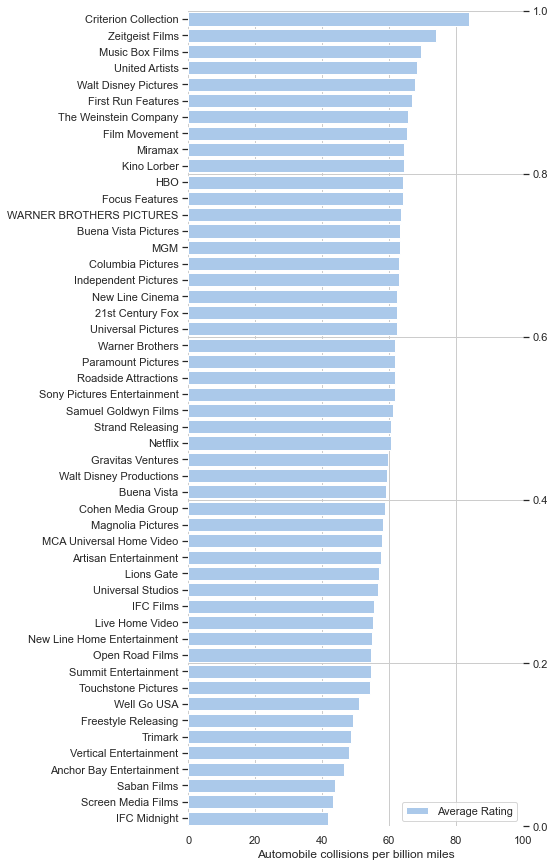

In [194]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y=average_rating_by_studio.index, x=average_rating_by_studio.values,
            label="Average Rating", color="b")
ax2 = ax.twinx()
# Plot the crashes where alcohol was involved
# sns.set_color_codes("muted")
# sns.barplot(y=top_50_studios_counts.index, x=top_50_studios_counts.values, ax=ax2,
#             label="Number of movies produced", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0,100), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

<AxesSubplot:>

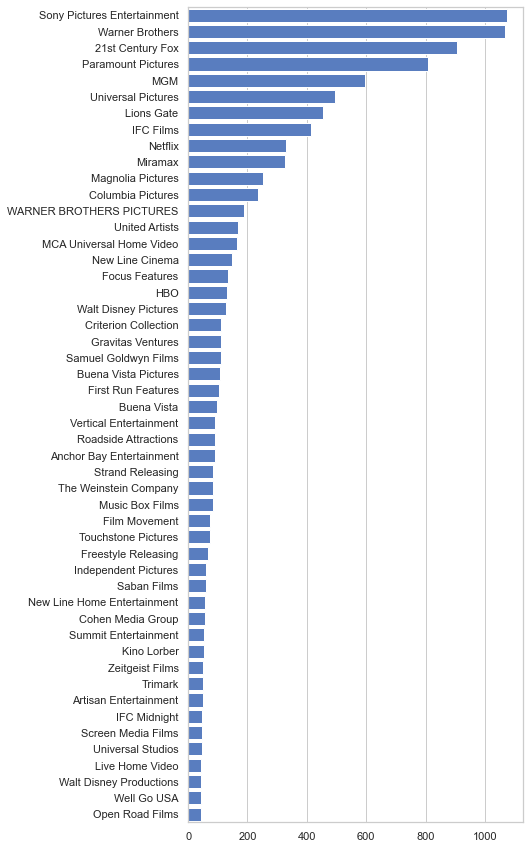

In [207]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("muted")
sns.barplot(y=top_50_studios_counts.index, x=top_50_studios_counts.values,
            label="Number of movies produced", color="b")

### BOM data

In [157]:
studio_counts = movie_gross_df['studio'].value_counts()[0:20]

In [158]:
# movie_gross_cleaned = movie_gross_df.dropna(subset = ['foreign_gross'])

In [197]:
import numpy as np
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].map(lambda x: 0 if x is np.nan else x)

In [198]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].str.replace(",",'')

In [199]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype(float)

In [200]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [202]:
movie_gross_df['total_gross'] = movie_gross_df['foreign_gross'] + movie_gross_df['domestic_gross']

In [203]:
movie_gross_df.sample(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
3326,The Little Mermaid (2018),Conglomerate,147000.0,NaN,2018,NaN
2685,Disorder,IFC,51900.0,NaN,2016,NaN
1208,The Family (2013),Rela.,36900000.0,41500000.0,2013,78400000.0
541,The Names of Love,MBox,514000.0,4099999.0,2011,4613999.0
849,The Perks of Being a Wallflower,LG/S,17700000.0,15600000.0,2012,33300000.0
2155,Running Man (2015),CL,311000.0,NaN,2015,NaN
1772,Omar,AF,356000.0,NaN,2014,NaN
1936,Vacation,WB (NL),58900000.0,46000000.0,2015,104900000.0
1883,Cinderella (2015),BV,201200000.0,342400000.0,2015,543600000.0
1328,In a World,RAtt.,3000000.0,NaN,2013,NaN


In [169]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


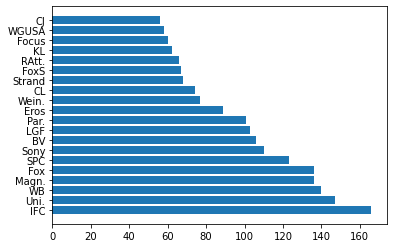

In [160]:
#How many movies each studio make

fig, ax = plt.subplots()

ax.barh(list(studio_counts.index), list(studio_counts.values))

plt.show()

In [163]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [168]:
movie_budget_gross = movie_gross_df.merge(movie_budget_df, how = 'left', left_on = 'title', right_on='movie')
movie_budget_gross.sample(10)

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
3090,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018,13.0,"Jun 22, 2018",Jurassic World: Fallen Kingdom,"$170,000,000","$417,719,760","$1,305,772,799"
318,The Red Baron,Mont.,37200.0,3100,2010,NaN,NaN,NaN,NaN,NaN,NaN
965,Agneepath,Eros,2000000.0,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN
2983,3 Idiotas,PNT,1200000.0,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN
892,People Like Us,BV,12400000.0,NaN,2012,60.0,"Jun 29, 2012",People Like Us,"$16,000,000","$12,431,792","$12,617,472"
703,Khodorkovsky,KL,39500.0,NaN,2011,NaN,NaN,NaN,NaN,NaN,NaN
1962,War Room,TriS,67800000.0,NaN,2015,66.0,"Aug 28, 2015",War Room,"$3,000,000","$67,790,117","$73,975,239"
1428,More Than Honey,KL,79800.0,NaN,2013,NaN,NaN,NaN,NaN,NaN,NaN
1223,The Grandmaster,Wein.,6600000.0,57500000,2013,NaN,NaN,NaN,NaN,NaN,NaN
3099,Ready Player One,WB,137700000.0,445200000,2018,78.0,"Mar 29, 2018",Ready Player One,"$150,000,000","$137,690,172","$579,290,136"


In [ ]:
## Jupyter Placeholder with learn-env

### Problem:

- Microsoft want to create a new movie studio but have no idea about creating movies
- respondible to ecplore what types of films are currently doing the best at the box office
- turn analysis to actionable insights
- the results from that will help Microsoft's new movie studio decide what type of films to create.

### Data:

- main data to use: IMDB (sql data) - movie_basics and movie_ratings table
- bom.movie_gross.csv 

### Analysis:

- Your analysis should yield three concrete business recommendations.
- Communicating about your work well is extremely important.
- highlighting the most important points and skipping over the rest.
- Use plenty of visualizations.
-  three visualizations which correspond to three business recommendations.

### Measurements to consider in measuring a movie's success based on [article](https://www.hollywoodreporter.com/movies/movie-news/what-is-profitable-movie-ever-1269879/)

- production cost
- box office gross
- marketing domestic/international
- rentals (the money the studio makes)
- distribution fee
- theatrical profit 
- international revenue



### Measurements available from data files

- domestic gross
- foreign gross


## Data understanding

### IMDB Database

* `movie_basics` : Table containing movies including original movie title, premiered movie title(primary title?), release year, length of the movie and the genre
* `persons` : Table containing the name of people in the theatre entertainment industry and their primary profession (actor, director etc.)
* `directors`: Table with movie ID and its correspongin director's ID
* `known_for`: Table containing the person's ID and the corresponding movie ID that the person is known for.
* `movie_akas`: Table containing movies and the title they are known as in different countries.
* `movie_ratings`: Table containing movie ID and their average rating and number of ratings they received on IMDB
* `principals`: Table containing movie ID and the corresponding person ID that is involved in the movie in some sort of capacity, specified in the category, jobs and character (if they are actors) columns.
* `writers` : Table containing movie ID and their corresponding writers' person ID

### bom.movie_gross.csv
* **Source** : This dataset comes from [Box office mojo](https://www.boxofficemojo.com/) - a website that tracks film revenue
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### rt.movie_info.tsv
* **Source** : This dataset comes from [Rotten Tomatoes](https://www.rottentomatoes.com/) - an "online aggregator of movie and TV show reviews from critics"
* **Contents** : Data about movies including their synopsis, rating, genre, director, writer, release data in theatre, release data on DVD, Box office rental profit, length of movie and studio of production.

### rt.reviews.tsv
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### tmdb.movies.csv
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### tn.movie_budgets.csv
* **Contents** : Data about movies' production budget along with release date, domestic gross and worldwide gross


Below we import the `sqlite3`, `pandas` and `numpy`, which will be used to for reading and exploring our data. We are also importing `seaborn` and `matplotlib` modules, which we will use for visualization.

#Run this cell without changes
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Functions for our analysis

strings_to_remove = ['$',',']

def remove_chars(ds,char):
    """
    remove characters from the data series
    -
    ds: data series, lists. Element in data series or list must be a string.
    char: character to be removed. Accepts str, lists
    """
    for char in char:
        idx = 0
        for row in ds:
            if char in row:
                ds[idx] = row.replace(char,"")
            idx +=1
    return ds


def read_sql_as_df(table_name, con):
    """
    Selects all columns in a database table and convert it into a Dataframe
    -
    Input:
    table_name = takes in a string of the table name to import
    con = variable that has the established database connection   
    -
    Output:
    DataFrame containing all columns of the database table.
    """
    query = """SELECT * FROM ({table_name})""".format(table_name = table_name)
    return pd.read_sql(query,con)

### IMDB Data

conn = sqlite3.connect('./zippedData/im.db')

imdb_schema = pd.read_sql("""

SELECT * from sqlite_master

""",conn)
imdb_schema

movie_akas_df = read_sql_as_df('movie_akas',conn)
movie_akas_df.head()

movie_ratings_df = read_sql_as_df('movie_ratings',conn)
movie_ratings_df.head()

directors_df = read_sql_as_df('directors',conn)
directors_df.head()

writers_df = read_sql_as_df('writers',conn)
writers_df.head()

movie_basics_df = read_sql_as_df('movie_basics',conn)
movie_basics_df.tail()
# movie_basics.columns

persons_df = read_sql_as_df('persons',conn)
persons_df.head()

known_for_df = read_sql_as_df("known_for",conn)
known_for_df.head()

principals_df = read_sql_as_df("principals",conn)
principals_df.head()

### Non database data

#### Rotten Tomatoes

rt_movies_df = pd.read_csv('./zippedData/rotten_tomatoes_movies.csv')
rt_movies_df.head()

movie_info_df = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', delimiter = '\t')
movie_info_df.head(3)

movie_reviews_df = pd.read_csv('./zippedData/rt.reviews.tsv.gz', delimiter = '\t',encoding = 'unicode_escape')
movie_reviews_df.head()

#### The number (budgets)

movie_budget_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
movie_budget_df.head()
# movie_budget_df.info()

#### Box office mojo (gross profit)

movie_gross_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
movie_gross_df.head()
# movie_gross_df.info()

#### TMDB movies

tmdb_movies_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
remove_chars(tmdb_movies_df['genre_ids'],["[","]"]) #genre_ids now is a string. Function turns it into a list.

tmdb_movies_df.head()
# tmdb_movies_df.info()

#Rreplace field that's entirely space (or empty) with '101', which is the genre key for genre "Unknown"
tmdb_movies_df['genre_ids'] = tmdb_movies_df['genre_ids'].str.replace(r'^\s*$','101')

tmdb_movies_df.info()

### Get genre ID from TMDB using API

import requests
from keys import tmdb_key #keys is the python file 

tmdb_2 = tmdb_key

# tmdb_url = f"https://api.themoviedb.org/3/genre/movie/list?api_key={tmdb_2}&language=en-US"

# #get response
# resp_tmdb = requests.get(tmdb_url)

# tmdb_json = resp_tmdb.json()
# tmdb_json['genres']
# tmdb_genre= {num['id']:num['name'] for num in tmdb_json['genres']}
# tmdb_genre[101] = 'Unknown'
# tmdb_genre

tmdb_genre= {28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western',
 101: 'Unknown'}

# for genre_list in tmdb_movies_df['genre_ids']:
#     genre_list = genre_list.split(', ')
#     genre_names=[]
#     for genre_id in genre_list:
#         if genre_id
#         genre_id=int(genre_id)
# #         print(type(genre_id))
#         genre_names = [tmdb_genre[genre_id]]


tmdb_movies_df.iloc[517]

genre_names_lists=[]
idx = 0
for genre_list in tmdb_movies_df['genre_ids']:
    genre_list = genre_list.split(', ')
    genre_names=[]
    genre_names = [tmdb_genre[int(genre_id)] for genre_id in genre_list]
    genre_names_lists.append(genre_names)
tmdb_movies_df['genre_names'] = genre_names_lists

tmdb_movies_df

### Start of preliminary Data exploratory

#### Genre popularity using IM.DB data

#Join the table movie_basics and movie_ratings to start exploring popularity and average reviews by genre.


movie_basics_reviews = pd.read_sql("""
SELECT mb.movie_id, mb.primary_title ,mb.start_year,mb.runtime_minutes, mb.genres
        ,r.averagerating, r.numvotes
        
FROM movie_basics as mb
INNER JOIN movie_ratings as r
        ON mb.movie_id = r.movie_id

""",conn)
movie_basics_reviews.info()

movie_basics_reviews.isna().sum() #checkout null values in our new table

#drop rows with null values in the genre column
movie_basics_reviews_cleaned = movie_basics_reviews.dropna(subset =['genres']) 

#Reset the table index after dropping the null rows
movie_basics_reviews_cleaned=movie_basics_reviews_cleaned.reset_index(drop=True)

movie_basics_reviews_cleaned

#List of common film genres

genre_list=["Action","Comedy","Drama","Fantasy","Horror","Mystery","Romance","Thriller","Western","Sci-Fi","Animation"
            ,"Documentary","Biography","Crime","Musical","History","Family"]

#Make a new column for each genre with boolean values. True if genre is one of the movie's genre list.

for genre in genre_list:
    movie_basics_reviews_cleaned[genre]=[True if genre in movie else False for movie in movie_basics_reviews_cleaned['genres']]

movie_basics_reviews_cleaned.head()

#Create genre popularity dict with genre name as keys and number of movies with that genre as values. The total values of all
#keys will be more than the total movies in the data because some movies are considered as multiple genres.

genre_popularity = { genre: movie_basics_reviews_cleaned[genre].sum() for genre in genre_list}
genre_popularity_values_sorted = dict(sorted(genre_popularity.items(),key=lambda item: item[1]))
genre_popularity_keys_sorted = dict(sorted(genre_popularity.items(),key=lambda item: item[0]))

genre_popularity

pd.DataFrame.from_dict(genre_popularity.values()).describe()

#Boxplot of genre popularity. Shows the genres that are outliers in terms of popularity
fig, ax = plt.subplots()

ax.boxplot(list(genre_popularity.values()))


plt.show()

#Bar Plot of Genre Popularity. 

fig, ax = plt.subplots()

ax.barh(list(genre_popularity_values_sorted.keys()),genre_popularity_values_sorted.values())


plt.show()

#Create empty dictionary that we will populate with genres as keys and average rating of all movies in the genre as values
genre_rating ={} 

#Calculating average rating:
for genre in genre_list: #loop through genre in the genre list defined prior
    n = 0 #number of movies 
    rating_sum = 0 #rating summation
    idx =0  #keep track of row index
    for row in movie_basics_reviews_cleaned[genre]: #go down row by row in genre column
        if (row==True): #if genre in genre list is in genre in the row
#             print(test['averagerating'][0])
            rating_sum += movie_basics_reviews_cleaned['averagerating'][idx] #grab the average rating and add it to the total sum
            n+=1 #add one to count of movie with that genre
        idx +=1 #keep track of row index
    genre_rating[genre] = rating_sum/n #calculate average rating of the genre
    
genre_rating_values_sorted =dict(sorted(genre_rating.items(),key=lambda item: item[1]))
genre_rating_keys_sorted = dict(sorted(genre_rating.items(),key=lambda item: item[0]))

genre_rating

# Average rating by genre

fig, ax = plt.subplots()

ax.barh(list(genre_rating_values_sorted.keys()),genre_rating_values_sorted.values())


plt.show()

# Looking at correlation between genre popularity and genre's average rating

fig, ax = plt.subplots()

ax.scatter(genre_popularity_keys_sorted.values(),genre_rating_keys_sorted.values())


plt.show()

# Looking at correlation between average rating and number of reviews

fig, ax = plt.subplots()

ax.scatter(movie_basics_reviews_cleaned['numvotes'],movie_basics_reviews_cleaned['averagerating'])


plt.show()

#### Genre Popularity using TMDB data





## Explore how casts/directors/actors affects popularity and ROI

principals_mb = principals_df.merge(movie_basics_df,how = 'left',on ='movie_id')

principals_mb_persons = principals_mb.merge(persons_df,how ='left',on ='person_id')
principals_mb_persons.head(3)

principal_actors = principals_mb_persons[principals_mb_persons['category'] == "actor"]
principal_actors.head()

principal_actors.isna().sum()

len(principal_actors['person_id'].unique())

principal_actors.info()

principal_actors['primary_name'].value_counts()

actor_20 = list(principal_actors['primary_name'].value_counts()[principal_actors['primary_name'].value_counts() > 20].index)


#filter out actors who starred less than 20 movies

principal_actors_20 = principal_actors.groupby("primary_name").filter(lambda x: len(x) > 20) 
principal_actors_20.head(3)

len(principal_actors_20)

### Top 20 Studios

#### Rotten Tomatoes

rt_movies_df_cleaned = rt_movies_df.dropna(subset = ['production_company','audience_rating'])
rt_movies_df_cleaned = rt_movies_df_cleaned.reset_index(drop = True)

rt_movies_df_cleaned.info()

studio_dict={"Sony": "Sony Pictures Entertainment", "Warner":"Warner Brothers","Fox":"21st Century Fox"
             , "Paramount":"Paramount Pictures",'MGM':'MGM', 'HBO':"HBO","Lion":"Lions Gate","Miramax":"Miramax",
             "Disney": "Walt Disney"}

len(rt_movies_df_cleaned['production_company'].unique())

rt_movies_df_cleaned.shape

idx = 0
for company in rt_movies_df_cleaned['production_company']:
    for key,value in studio_dict.items():
        if key in company:
#             print (company, value)
#             print ("Before: ", rt_movies_df_cleaned['production_company'][idx])
            rt_movies_df_cleaned['production_company'][idx] = value
#             print("After: ", rt_movies_df_cleaned['production_company'][idx])
    idx +=1     

len(rt_movies_df_cleaned['production_company'].unique())

rt_movies_df_cleaned.shape

top_50_studios = list(rt_movies_df_cleaned['production_company'].value_counts().index)[0:50]
top_50_studios_counts = rt_movies_df_cleaned['production_company'].value_counts()[0:50]
top_50_studios_counts

#Filter dataframe to just movies produced by the top 50 studios
rt_movies_top_50_studios = rt_movies_df_cleaned[rt_movies_df_cleaned['production_company'].isin(top_50_studios)]
rt_movies_top_50_studios.tail(2)

average_rating_by_studio = rt_movies_top_50_studios.groupby('production_company').mean()['audience_rating']
average_rating_by_studio = average_rating_by_studio.sort_values(ascending = False)
average_rating_by_studio

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y=average_rating_by_studio.index, x=average_rating_by_studio.values,
            label="Average Rating", color="b")
ax2 = ax.twinx()
# Plot the crashes where alcohol was involved
# sns.set_color_codes("muted")
# sns.barplot(y=top_50_studios_counts.index, x=top_50_studios_counts.values, ax=ax2,
#             label="Number of movies produced", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0,100), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("muted")
sns.barplot(y=top_50_studios_counts.index, x=top_50_studios_counts.values,
            label="Number of movies produced", color="b")



### BOM data

studio_counts = movie_gross_df['studio'].value_counts()[0:20]

# movie_gross_cleaned = movie_gross_df.dropna(subset = ['foreign_gross'])

import numpy as np
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].map(lambda x: 0 if x is np.nan else x)

movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].str.replace(",",'')

movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype(float)

movie_gross_df.info()

movie_gross_df['total_gross'] = movie_gross_df['foreign_gross'] + movie_gross_df['domestic_gross']

movie_gross_df.sample(10)

movie_gross_df.head()

#How many movies each studio make

fig, ax = plt.subplots()

ax.barh(list(studio_counts.index), list(studio_counts.values))

plt.show()



movie_budget_df.info()

movie_budget_gross = movie_gross_df.merge(movie_budget_df, how = 'left', left_on = 'title', right_on='movie')
movie_budget_gross.sample(10)

